Investigation on the facilities nearby and  age distribution of planning areas in Singapore

### Objective 
- To discover regions with high population of childree, adolescents and elderly people


#Data Analysis

### Folder Setting



In [ ]:
# Drive auth
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')


Mounted at /content/drive


### Data Manipulation





*   Import related libaraies
*   Load the population source data 
* Refine the data to fit the criteria



In [ ]:
# python libarires
import pandas as pd
#Libaries for graph plotting
import seaborn as sns
import matplotlib.pyplot as plt

!pip install geopandas
import geopandas

     |████████████████████████████████| 1.0MB 12.5MB/s 
     |████████████████████████████████| 6.5MB 54.7MB/s 
     |████████████████████████████████| 15.3MB 276kB/s 


In [ ]:
POP_PLAN_AREA_NAME = "population_planning_area_sg"
POP_SUB_ZONE_AREA_NAME = "population_sub_zone_sg"
DATA_FOLDER_PATH = "/content/drive/My Drive/IBM_Data_Science_Course/Capstone_Project/data/population_sg"
%cd {DATA_FOLDER_PATH}

/content/drive/My Drive/IBM_Data_Science_Course/Capstone_Project/data/population_sg


In [ ]:
planAreaPopRawDF = pd.read_csv(POP_PLAN_AREA_NAME + ".csv") 
planAreaPopRawDF

,year,level_1,level_2,level_3,value
0,2015,Total,Total,Total,3902690
1,2015,Total,Total,Ang Mo Kio- Total,174770
2,2015,Total,Total,Bedok- Total,289750
3,2015,Total,Total,Bishan- Total,90700
4,2015,Total,Total,Boon Lay- Total,30
...,...,...,...,...,...
2354,2015,Females,85 & Over,Tanglin- Total,160
2355,2015,Females,85 & Over,Toa Payoh- Total,1540
2356,2015,Females,85 & Over,Western Water Catchment- Total,30
2357,2015,Females,85 & Over,Woodlands- Total,810


In [ ]:
subzonePopRawDF = pd.read_csv(POP_SUB_ZONE_AREA_NAME + ".csv") 
subzonePopRawDF.columns = ["year","gender","age_range","planning_area","sub_zone","population"]
subzonePopRawDF

,year,gender,age_range,planning_area,sub_zone,population
0,2015,Total,Total,Ang Mo Kio- Total,Ang Mo Kio Town Centre,5020
1,2015,Total,Total,Ang Mo Kio- Total,Cheng San,29770
2,2015,Total,Total,Ang Mo Kio- Total,Chong Boon,27900
3,2015,Total,Total,Ang Mo Kio- Total,Kebun Bahru,23910
4,2015,Total,Total,Ang Mo Kio- Total,Sembawang Hills,6890
...,...,...,...,...,...,...
12611,2015,Females,85 & Over,Yishun- Total,Springleaf,30
12612,2015,Females,85 & Over,Yishun- Total,Yishun Central,10
12613,2015,Females,85 & Over,Yishun- Total,Yishun East,160
12614,2015,Females,85 & Over,Yishun- Total,Yishun South,240


In [ ]:
#Data manipulation
def convertAge(ageStr):
  ageDict = {
      "Total": 0,
      "0 - 4": 2,
      "5 - 9": 7,
      "10 - 14": 12,
      "15 - 19": 17,
      "20 - 24": 22,
      "25 - 29": 27,
      "30 - 34": 32,
      "35 - 39": 37,
      "40 - 44": 42,
      "45 - 49": 47,
      "50 - 54": 52,
      "55 - 59": 57,
      "60 - 64": 62,
      "65 - 69": 67,
      "70 - 74": 72,
      "75 - 79": 77,
      "80 - 84": 82,
      "85 & Over": 87,
  }
  if ageStr in ageDict:
    return ageDict[ageStr]
  else:
    return -1
def getAgeGroup(age):
  if age == 0:
    return "all"
  elif age < 10:
    return "children"
  elif age < 20:
    return "adolescent"
  elif age < 30:
    return "young_adult"
  elif age < 65:
    return "adult"
  else:
    return "elderly"


subzonePopRawDF["age"] = subzonePopRawDF.apply(lambda x: convertAge(x["age_range"]), axis=1)
subzonePopRawDF["age_group"] = subzonePopRawDF.apply(lambda x: getAgeGroup(x["age"]), axis=1)
subzonePopRawDF["planning_area"] = subzonePopRawDF.apply(lambda x: x["planning_area"].split("-")[0], axis=1)
subzonePopRawDF


,year,gender,age_range,planning_area,sub_zone,population,age,age_group
0,2015,Total,Total,Ang Mo Kio,Ang Mo Kio Town Centre,5020,0,all
1,2015,Total,Total,Ang Mo Kio,Cheng San,29770,0,all
2,2015,Total,Total,Ang Mo Kio,Chong Boon,27900,0,all
3,2015,Total,Total,Ang Mo Kio,Kebun Bahru,23910,0,all
4,2015,Total,Total,Ang Mo Kio,Sembawang Hills,6890,0,all
...,...,...,...,...,...,...,...,...
12611,2015,Females,85 & Over,Yishun,Springleaf,30,87,elderly
12612,2015,Females,85 & Over,Yishun,Yishun Central,10,87,elderly
12613,2015,Females,85 & Over,Yishun,Yishun East,160,87,elderly
12614,2015,Females,85 & Over,Yishun,Yishun South,240,87,elderly


In [ ]:
# grab planning area table in wiki
planAreaInfoDF = pd.read_html('https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore')[2]
planAreaInfoDF

,Name (English),Malay,Chinese,Pinyin,Tamil,Region,Area (km2),Population[7],Density (/km2)
0,Ang Mo Kio,NaN,宏茂桥,Hóng mào qiáo,ஆங் மோ கியோ,North-East,13.94,163950,13400
1,Bedok,*,勿洛,Wù luò,பிடோக்,East,21.69,279380,13000
2,Bishan,NaN,碧山,Bì shān,பீஷான்,Central,7.62,88010,12000
3,Boon Lay,NaN,文礼,Wén lǐ,பூன் லே,West,8.23,30,3.6
4,Bukit Batok,*,武吉巴督,Wǔjí bā dū,புக்கிட் பாத்தோக்,West,11.13,153740,14000
5,Bukit Merah,*,红山,Hóng shān,புக்கிட் மேரா,Central,14.34,151980,11000
6,Bukit Panjang,*,武吉班让,Wǔjí bān ràng,பக்கிட் பஞ்சாங்,West,8.99,139280,15000
7,Bukit Timah,*,武吉知马,Wǔjí zhī mǎ,புக்கித் திமா,Central,17.53,77430,4400
8,Central Water Catchment,Kawasan Tadahan Air Tengah,中央集水区,Zhōngyāng jí shuǐ qū,மத்திய நீர் நீர்ப்பிடிப்பு,North,37.15,*,*
9,Changi,*,樟宜,Zhāng yí,சாங்கி,East,40.61,1830,80.62


### Data Processing

In [ ]:
#Get Subzone area DF

subZoneAreaGroupDict = subzonePopRawDF.groupby(['planning_area','sub_zone']).groups.keys()
planningSubZoneMappingDF = pd.DataFrame.from_dict(subZoneAreaGroupDict)
planningSubZoneMappingDF.columns = ["planning_area","sub_zone"]
planningSubZoneMappingDF["planning_area"] = planningSubZoneMappingDF.apply(lambda x: x["planning_area"].split("-")[0], axis=1)
planningSubZoneMappingDF

,planning_area,sub_zone
0,Ang Mo Kio,Ang Mo Kio Town Centre
1,Ang Mo Kio,Cheng San
2,Ang Mo Kio,Chong Boon
3,Ang Mo Kio,Kebun Bahru
4,Ang Mo Kio,Sembawang Hills
...,...,...
276,Yishun,Springleaf
277,Yishun,Yishun Central
278,Yishun,Yishun East
279,Yishun,Yishun South


In [ ]:
# Sub Zone area analysis
planningAreaTotalPopDF = subzonePopRawDF.groupby(['planning_area'])["population"].sum().reset_index()
planningAreaTotalPopDF

,planning_area,population
0,Ang Mo Kio,699310
1,Bedok,1159180
2,Bishan,362860
3,Boon Lay,30
4,Bukit Batok,557320
5,Bukit Merah,623670
6,Bukit Panjang,556300
7,Bukit Timah,298080
8,Central Water Catchment,10
9,Changi,10120


In [ ]:
subzoneTotalPopDF = subzonePopRawDF.groupby(['sub_zone'])["population"].sum().reset_index()
subzoneTotalPopDF

,sub_zone,population
0,Admiralty,57640
1,Alexandra Hill,62630
2,Alexandra North,3990
3,Aljunied,166840
4,Anak Bukit,87970
...,...,...
276,Yishun South,155370
277,Yishun West,231560
278,Yuhua East,109890
279,Yuhua West,83530


In [ ]:
#Subzone - age_range group
subzoneAreaAgeRangeDF = subzonePopRawDF.groupby(['sub_zone','planning_area','age_range'])["population"].sum().reset_index()
subzoneAreaAgeRangeDF

,sub_zone,planning_area,age_range,population
0,Admiralty,Sembawang,0 - 4,2000
1,Admiralty,Sembawang,10 - 14,1990
2,Admiralty,Sembawang,15 - 19,1560
3,Admiralty,Sembawang,20 - 24,1400
4,Admiralty,Sembawang,25 - 29,2040
...,...,...,...,...
4313,Yunnan,Jurong West,70 - 74,2400
4314,Yunnan,Jurong West,75 - 79,1610
4315,Yunnan,Jurong West,80 - 84,890
4316,Yunnan,Jurong West,85 & Over,620


In [ ]:
#Subzone - age group
subzonAreaAgeDF = subzonePopRawDF.groupby(['sub_zone','planning_area','age'])["population"].sum().reset_index()
subzonAreaAgeDF

,sub_zone,planning_area,age,population
0,Admiralty,Sembawang,0,28810
1,Admiralty,Sembawang,2,2000
2,Admiralty,Sembawang,7,2260
3,Admiralty,Sembawang,12,1990
4,Admiralty,Sembawang,17,1560
...,...,...,...,...
4313,Yunnan,Jurong West,67,5260
4314,Yunnan,Jurong West,72,2400
4315,Yunnan,Jurong West,77,1610
4316,Yunnan,Jurong West,82,890


In [ ]:
#Subzone - age_type group
subzoneAreaAgeCatDF = subzonePopRawDF.groupby(['sub_zone','planning_area','age_group'])["population"].sum().reset_index()
subzoneAreaAgeCatDF

,sub_zone,planning_area,age_group,population
0,Admiralty,Sembawang,adolescent,3550
1,Admiralty,Sembawang,adult,15330
2,Admiralty,Sembawang,all,28810
3,Admiralty,Sembawang,children,4260
4,Admiralty,Sembawang,elderly,2250
...,...,...,...,...
1413,Yunnan,Jurong West,adult,74470
1414,Yunnan,Jurong West,all,141780
1415,Yunnan,Jurong West,children,12930
1416,Yunnan,Jurong West,elderly,10780


In [ ]:
subzoneAreaAgeElderlyDF = subzoneAreaAgeCatDF[subzoneAreaAgeCatDF["age_group"] == "elderly"]
subzoneAreaAgeElderlyDF

,sub_zone,planning_area,age_group,population
4,Admiralty,Sembawang,elderly,2250
10,Alexandra Hill,Bukit Merah,elderly,5980
16,Alexandra North,Bukit Merah,elderly,130
22,Aljunied,Geylang,elderly,12860
28,Anak Bukit,Bukit Timah,elderly,5990
...,...,...,...,...
1392,Yishun South,Yishun,elderly,8390
1398,Yishun West,Yishun,elderly,12890
1404,Yuhua East,Jurong East,elderly,7490
1410,Yuhua West,Jurong East,elderly,5150


In [ ]:
subzoneAreaAgeYoungDF = subzoneAreaAgeCatDF[subzoneAreaAgeCatDF["age_group"] == "adolescent"]
subzoneAreaAgeYoungDF

,sub_zone,planning_area,age_group,population
0,Admiralty,Sembawang,adolescent,3550
6,Alexandra Hill,Bukit Merah,adolescent,3150
12,Alexandra North,Bukit Merah,adolescent,220
18,Aljunied,Geylang,adolescent,8010
24,Anak Bukit,Bukit Timah,adolescent,5670
...,...,...,...,...
1388,Yishun South,Yishun,adolescent,8660
1394,Yishun West,Yishun,adolescent,12960
1400,Yuhua East,Jurong East,adolescent,5890
1406,Yuhua West,Jurong East,adolescent,4830


In [ ]:
subzoneAreaAgeChildrenDF = subzoneAreaAgeCatDF[subzoneAreaAgeCatDF["age_group"] == "children"]
subzoneAreaAgeChildrenDF

,sub_zone,planning_area,age_group,population
3,Admiralty,Sembawang,children,4260
9,Alexandra Hill,Bukit Merah,children,2580
15,Alexandra North,Bukit Merah,children,280
21,Aljunied,Geylang,children,6900
27,Anak Bukit,Bukit Timah,children,3750
...,...,...,...,...
1391,Yishun South,Yishun,children,6390
1397,Yishun West,Yishun,children,9660
1403,Yuhua East,Jurong East,children,4230
1409,Yuhua West,Jurong East,children,3500


In [ ]:
# Read subzone location csv
SUB_ZONE_LOCATION = "sg_subzone_location"
subzoneLocDF = pd.read_csv(SUB_ZONE_LOCATION+".csv")
subzoneLocDF

,X,Y,gid,Name,description,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D
0,103.837635,1.293569,2,kml_2,NaN,5,INSTITUTION HILL,RVSZ05,Y,RIVER VALLEY,RV,CENTRAL REGION,CR,C3C22D1EE31757BD,20191223152313
1,103.670216,1.259986,4,kml_4,NaN,1,JURONG ISLAND AND BUKOM,WISZ01,N,WESTERN ISLANDS,WI,WEST REGION,WR,C87E378D3456FC35,20191223152313
2,103.845487,1.293748,5,kml_5,NaN,2,FORT CANNING,MUSZ02,Y,MUSEUM,MU,CENTRAL REGION,CR,8E8F2616FFA9E019,20191223152313
3,103.649921,1.327996,112,kml_112,NaN,3,TUAS NORTH,TSSZ03,N,TUAS,TS,WEST REGION,WR,1CD927A110152200,20191223152313
4,103.719210,1.208016,7,kml_7,NaN,3,SUDONG,WISZ03,N,WESTERN ISLANDS,WI,WEST REGION,WR,F718C723E08FBD51,20191223152313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,103.852282,1.454542,323,kml_323,NaN,2,TANJONG IRAU,SMSZ02,N,SIMPANG,SM,NORTH REGION,NR,74181C5882F588F0,20191223152313
328,103.812567,1.428835,326,kml_326,NaN,2,MANDAI EAST,MDSZ02,N,MANDAI,MD,NORTH REGION,NR,FF210164B740FEFC,20191223152313
329,103.814683,1.404369,327,kml_327,NaN,7,NEE SOON,YSSZ07,N,YISHUN,YS,NORTH REGION,NR,DF8BD7E1E39CEFFD,20191223152313
330,103.912302,1.359381,325,kml_325,NaN,5,PLAB,PLSZ05,N,PAYA LEBAR,PL,EAST REGION,ER,5EED202C9AB77BA1,20191223152313


In [ ]:
planningSubZoneMappingDF["SUBZONE_N"] = planningSubZoneMappingDF.apply(lambda x: x["sub_zone"].upper(), axis=1)
planningSubZoneMappingDF

# merge subzone loc df to subzone df
subzoneAreaLocDF = pd.merge(planningSubZoneMappingDF,subzoneLocDF, on=["SUBZONE_N"])
subzoneAreaLocDF = subzoneAreaLocDF[["planning_area","sub_zone","SUBZONE_N","X","Y"]]
subzoneAreaLocDF

,planning_area,sub_zone,SUBZONE_N,X,Y
0,Ang Mo Kio,Ang Mo Kio Town Centre,ANG MO KIO TOWN CENTRE,103.846691,1.373071
1,Ang Mo Kio,Cheng San,CHENG SAN,103.853970,1.372865
2,Ang Mo Kio,Chong Boon,CHONG BOON,103.855975,1.362788
3,Ang Mo Kio,Kebun Bahru,KEBUN BAHRU,103.839166,1.372995
4,Ang Mo Kio,Sembawang Hills,SEMBAWANG HILLS,103.829811,1.374314
...,...,...,...,...,...
273,Yishun,Springleaf,SPRINGLEAF,103.822657,1.403046
274,Yishun,Yishun Central,YISHUN CENTRAL,103.837949,1.426681
275,Yishun,Yishun East,YISHUN EAST,103.847740,1.427755
276,Yishun,Yishun South,YISHUN SOUTH,103.838575,1.418575


In [ ]:
subzoneTotalPopDF["SUBZONE_N"] = subzoneTotalPopDF.apply(lambda x: x["sub_zone"].upper(), axis=1)
subzoneAreaAgeElderlyDF["SUBZONE_N"] = subzoneAreaAgeElderlyDF.apply(lambda x: x["sub_zone"].upper(), axis=1)
subzoneAreaAgeYoungDF["SUBZONE_N"] = subzoneAreaAgeYoungDF.apply(lambda x: x["sub_zone"].upper(), axis=1)
subzoneAreaAgeChildrenDF["SUBZONE_N"] = subzoneAreaAgeChildrenDF.apply(lambda x: x["sub_zone"].upper(), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#Plot distribution of old age
subZoneAreaOldWithLocDF = pd.merge(subZoneAreaAgeTypeGroupOldDF,subZoneAreaLocDF, on=["sub_zone"])
subZoneAreaOldWithLocDF

fig, ax = plt.subplots()
fig.set_size_inches(0.05, 0.05)
sns.relplot(x='X', y='Y', hue='population', data=subZoneAreaOldWithLocDF)


NameError: ignored

### Map processing

In [ ]:
#Load map data
import geopandas as gpd
SUBZONE_MAP_FILE = "subzone_map/Subzone_Census2010"
sgMapDF = geopandas.read_file(SUBZONE_MAP_FILE + ".shp")

sgMapDF count: 311 sgMapWithInfoDF count: 311


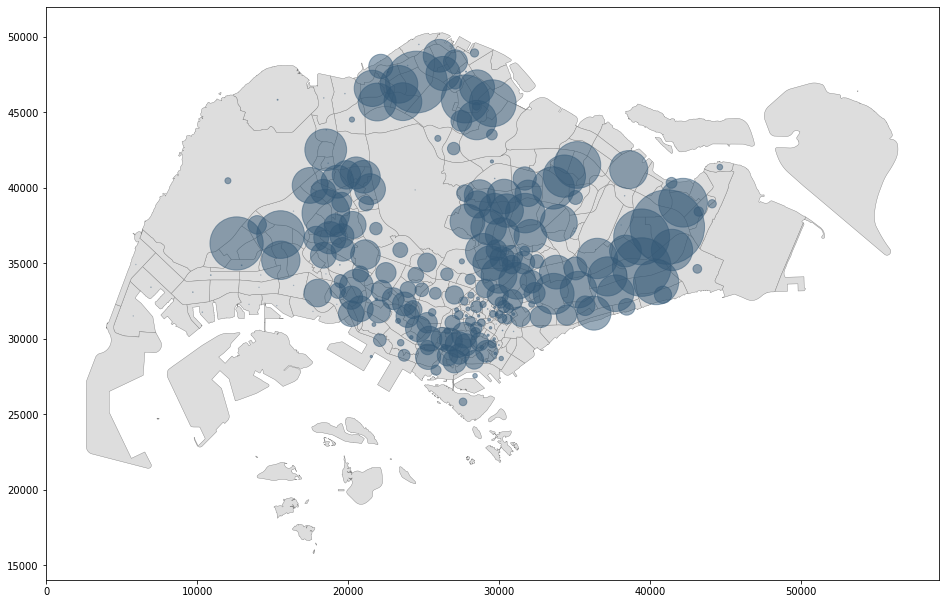

In [ ]:
#Plot population total

sgMapWithInfoDF = pd.merge(sgMapDF,subzoneTotalPopDF, on=["SUBZONE_N"], how="left")
print("sgMapDF count: " + str(len(sgMapDF)) + " sgMapWithInfoDF count: " + str(len(sgMapDF)))
sgMapWithInfoDF["geometry"] = sgMapWithInfoDF["geometry"].centroid
sgMapWithInfoDF["population_normalize"] = sgMapWithInfoDF["population"]/100
sgMapWithInfoDF["color"] = "#345977"
fig, ax = plt.subplots(figsize=(16,16))
sgMapDF.to_csv("sg_map_data.csv")
sgMapWithInfoDF.to_csv("sg_map_data_combined.csv")
sgMapDF.plot(ax=ax, color="#DDDDDD", edgecolor="grey", linewidth=0.4)
sgMapWithInfoDF.plot(ax=ax, c=sgMapWithInfoDF["color"], markersize="population_normalize",alpha=0.5, categorical=False, legend=True )

# converting dataframe to geodataframe 
# gdf_points = gpd.GeoDataFrame(df, geometry='coordinates')
# gdf_points.crs = gdf_polygons.crs

# # spatial join
# sjoin = gpd.sjoin(gdf_points, gdf_polygons, how='left')

# # converting geodataframe to dataframe
# df_sjoin = pd.DataFrame(sjoin)
# # checking missing values
# df_sjoin[df_sjoin.geoid.isnull()].shape

sgMapDF count: 311 sgMapWithInfoDF count: 311


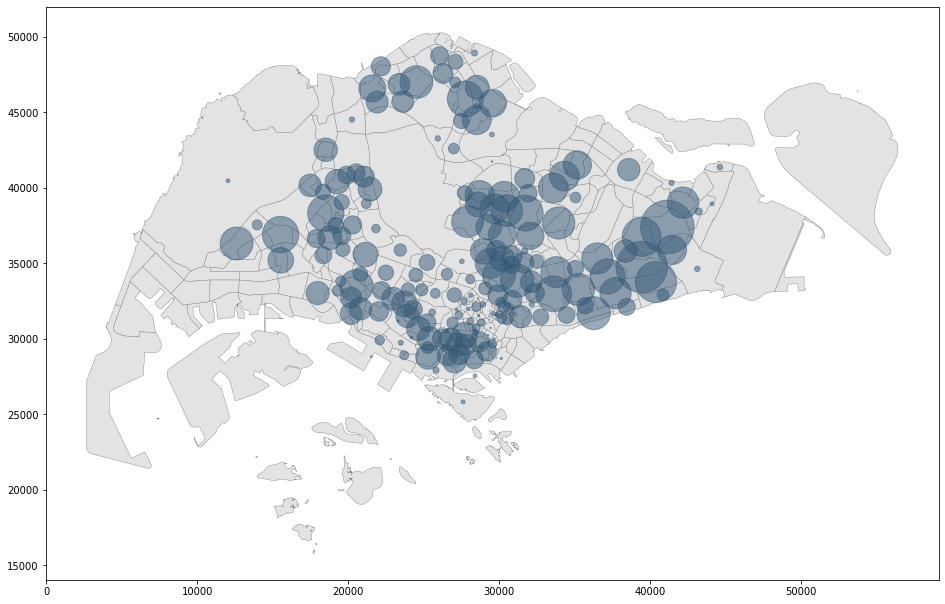

In [ ]:
#Elderly only

sgMapWithInfoDF = pd.merge(sgMapDF,subzoneAreaAgeElderlyDF, on=["SUBZONE_N"], how="left")
# sgMapWithInfoDF.plot()
print("sgMapDF count: " + str(len(sgMapDF)) + " sgMapWithInfoDF count: " + str(len(sgMapDF)))
sgMapWithInfoDF["geometry"] = sgMapWithInfoDF["geometry"].centroid
sgMapWithInfoDF["population_normalize"] = sgMapWithInfoDF["population"]/10
sgMapWithInfoDF["color"] = "#345977"
fig, ax = plt.subplots(figsize=(16,16))
sgMapDF.to_csv("sg_map_data.csv")
sgMapWithInfoDF.to_csv("sg_map_data_combined.csv")
sgMapDF.plot(ax=ax, color="#E3E3E3", edgecolor="grey", linewidth=0.4)
sgMapWithInfoDF.plot(ax=ax, c=sgMapWithInfoDF["color"], markersize="population_normalize",alpha=0.5, categorical=False, legend=True )

plt.show()


sgMapDF count: 311 sgMapWithInfoDF count: 311


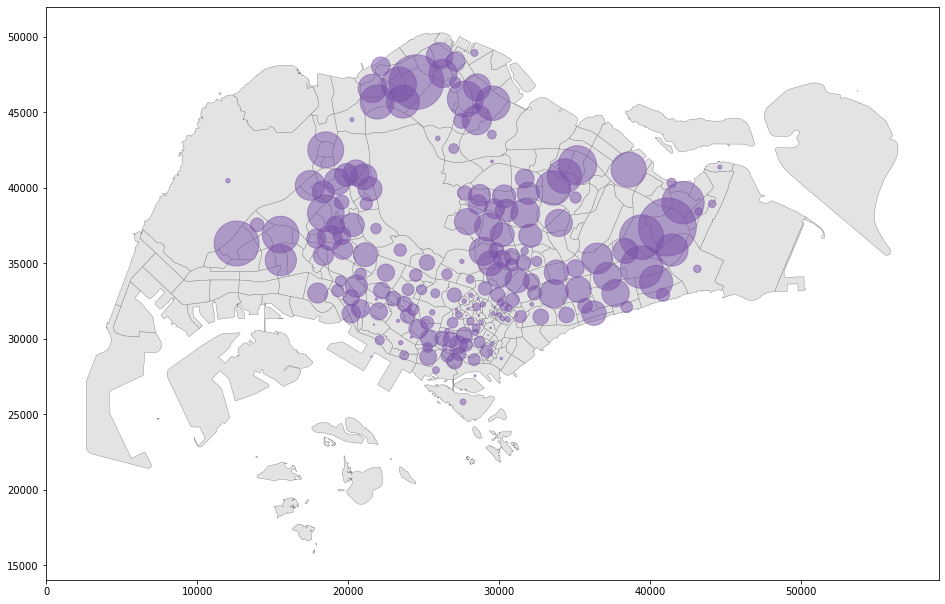

In [ ]:
#Adolescent Only

sgMapWithInfoDF = pd.merge(sgMapDF,subzoneAreaAgeYoungDF, on=["SUBZONE_N"], how="left")
# sgMapWithInfoDF.plot()
print("sgMapDF count: " + str(len(sgMapDF)) + " sgMapWithInfoDF count: " + str(len(sgMapDF)))
sgMapWithInfoDF["geometry"] = sgMapWithInfoDF["geometry"].centroid
sgMapWithInfoDF["population_normalize"] = sgMapWithInfoDF["population"]/10
sgMapWithInfoDF["color"] = "#7850A8"
fig, ax = plt.subplots(figsize=(16,16))
sgMapDF.to_csv("sg_map_data.csv")
sgMapWithInfoDF.to_csv("sg_map_data_combined.csv")
sgMapDF.plot(ax=ax, color="#E3E3E3", edgecolor="grey", linewidth=0.4)
sgMapWithInfoDF.plot(ax=ax, c=sgMapWithInfoDF["color"], markersize="population_normalize",alpha=0.5, categorical=False, legend=True )

plt.show()

sgMapDF count: 311 sgMapWithInfoDF count: 311


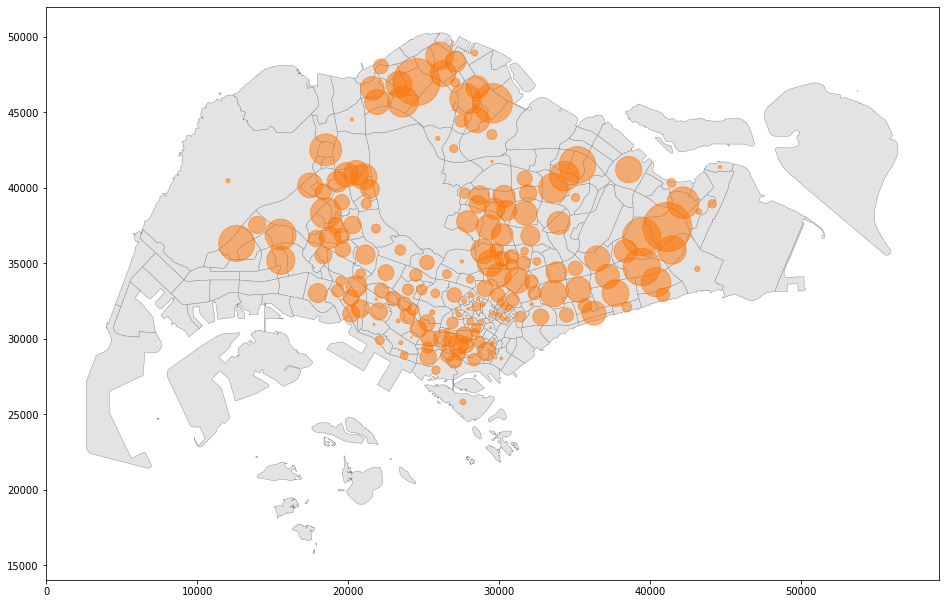

In [ ]:
#Children Only

sgMapWithInfoDF = pd.merge(sgMapDF,subzoneAreaAgeChildrenDF, on=["SUBZONE_N"], how="left")
# sgMapWithInfoDF.plot()
print("sgMapDF count: " + str(len(sgMapDF)) + " sgMapWithInfoDF count: " + str(len(sgMapDF)))
sgMapWithInfoDF["geometry"] = sgMapWithInfoDF["geometry"].centroid
sgMapWithInfoDF["population_normalize"] = sgMapWithInfoDF["population"]/10
sgMapWithInfoDF["color"] = "#FF7300"
fig, ax = plt.subplots(figsize=(16,16))
sgMapDF.to_csv("sg_map_data.csv")
sgMapWithInfoDF.to_csv("sg_map_data_combined.csv")
sgMapDF.plot(ax=ax, color="#E3E3E3", edgecolor="grey", linewidth=0.4)
sgMapWithInfoDF.plot(ax=ax, c=sgMapWithInfoDF["color"], markersize="population_normalize",alpha=0.5, categorical=False, legend=True )

plt.show()

In [ ]:
#Top 10 of subzone population with children
subzoneAreaAgeChildrenDF = subzoneAreaAgeChildrenDF.sort_values(["population"],ascending=False)
subzoneAreaAgeChildrenDF.head(10)

,sub_zone,planning_area,age_group,population,SUBZONE_N
1149,Tampines East,Tampines,children,24080,TAMPINES EAST
1330,Woodlands East,Woodlands,children,22280,WOODLANDS EAST
515,Jurong West Central,Jurong West,children,18120,JURONG WEST CENTRAL
1385,Yishun East,Yishun,children,15590,YISHUN EAST
1155,Tampines West,Tampines,children,14480,TAMPINES WEST
366,Fernvale,Sengkang,children,14120,FERNVALE
64,Bedok North,Bedok,children,13930,BEDOK NORTH
960,Rivervale,Sengkang,children,13780,RIVERVALE
1030,Sengkang Town Centre,Sengkang,children,13490,SENGKANG TOWN CENTRE
928,Punggol Field,Punggol,children,13480,PUNGGOL FIELD


In [ ]:
subzonePlanningAreaAgeChildrenDF = subzoneAreaAgeChildrenDF.groupby("planning_area").sum().reset_index().sort_values(["population"],ascending=False)
subzonePlanningAreaAgeChildrenDF.head(10)

,planning_area,population
30,Sengkang,61020
14,Jurong West,58980
39,Woodlands,52780
1,Bedok,50210
35,Tampines,46950
24,Punggol,42420
40,Yishun,40380
12,Hougang,36850
8,Choa Chu Kang,33060
5,Bukit Panjang,29900


In [ ]:
#Top 10 of subzone population with young people
subzoneAreaAgeYoungDF = subzoneAreaAgeYoungDF.sort_values(["population"],ascending=False)
subzoneAreaAgeYoungDF.head(10)

,sub_zone,planning_area,age_group,population,SUBZONE_N
1146,Tampines East,Tampines,adolescent,33560,TAMPINES EAST
1327,Woodlands East,Woodlands,adolescent,29880,WOODLANDS EAST
1412,Yunnan,Jurong West,adolescent,20250,YUNNAN
1152,Tampines West,Tampines,adolescent,19470,TAMPINES WEST
61,Bedok North,Bedok,adolescent,18190,BEDOK NORTH
863,Pasir Ris Drive,Pasir Ris,adolescent,17940,PASIR RIS DRIVE
512,Jurong West Central,Jurong West,adolescent,16640,JURONG WEST CENTRAL
957,Rivervale,Sengkang,adolescent,16430,RIVERVALE
1027,Sengkang Town Centre,Sengkang,adolescent,14830,SENGKANG TOWN CENTRE
458,Hong Kah,Jurong West,adolescent,13460,HONG KAH


In [ ]:
subzonePlanningAreaAgeYoungDF = subzoneAreaAgeYoungDF.groupby("planning_area").sum().reset_index().sort_values(["population"],ascending=False)
subzonePlanningAreaAgeYoungDF.head(10)

,planning_area,population
39,Woodlands,76070
14,Jurong West,69460
35,Tampines,64000
1,Bedok,63380
8,Choa Chu Kang,52400
12,Hougang,52130
30,Sengkang,48950
40,Yishun,45260
23,Pasir Ris,42700
5,Bukit Panjang,35780


In [ ]:
#Top 10 of subzone population with elder people
subzoneAreaAgeElderlyDF = subzoneAreaAgeElderlyDF.sort_values(["population"],ascending=False)
subzoneAreaAgeElderlyDF.head(10)

,sub_zone,age_group,population,SUBZONE_N
1150,Tampines East,elderly,28700,TAMPINES EAST
65,Bedok North,elderly,26350,BEDOK NORTH
77,Bedok South,elderly,16820,BEDOK SOUTH
1156,Tampines West,elderly,15160,TAMPINES WEST
462,Hong Kah,elderly,13260,HONG KAH
1065,Serangoon Garden,elderly,12930,SERANGOON GARDEN
1398,Yishun West,elderly,12890,YISHUN WEST
22,Aljunied,elderly,12860,ALJUNIED
583,Kembangan,elderly,12180,KEMBANGAN
486,Hougang West,elderly,11600,HOUGANG WEST


In [ ]:
#Top 10 of subzone population with chidren
subzoneAreaAgeElderlyDF = subzoneAreaAgeElderlyDF.sort_values(["population"],ascending=False)
subzoneAreaAgeElderlyDF.head(10)

,sub_zone,planning_area,age_group,population,SUBZONE_N
1150,Tampines East,Tampines,elderly,28700,TAMPINES EAST
65,Bedok North,Bedok,elderly,26350,BEDOK NORTH
77,Bedok South,Bedok,elderly,16820,BEDOK SOUTH
1156,Tampines West,Tampines,elderly,15160,TAMPINES WEST
462,Hong Kah,Jurong West,elderly,13260,HONG KAH
1065,Serangoon Garden,Serangoon,elderly,12930,SERANGOON GARDEN
1398,Yishun West,Yishun,elderly,12890,YISHUN WEST
22,Aljunied,Geylang,elderly,12860,ALJUNIED
583,Kembangan,Bedok,elderly,12180,KEMBANGAN
486,Hougang West,Hougang,elderly,11600,HOUGANG WEST


In [ ]:
subzonePlanningAreaAgeElderlyDF = subzoneAreaAgeElderlyDF.groupby("planning_area").sum().reset_index().sort_values(["population"],ascending=False)
subzonePlanningAreaAgeElderlyDF.head(10)

,planning_area,population
1,Bedok,84370
4,Bukit Merah,57420
0,Ang Mo Kio,56920
12,Hougang,53810
35,Tampines,52700
14,Jurong West,46300
37,Toa Payoh,44340
40,Yishun,38760
39,Woodlands,35910
11,Geylang,35470


In [ ]:
grouped = popSubZoneAreaDF.groupby(['sub_zone','age'])
# grouped = grouped.filter(lambda x: x["age"] == "85 & Over")
subZoneAreaGroupBySubzoneAge60 = grouped.filter(lambda x: (x.age == "85 & Over").any() or (x.age == "80 - 84").any())
subZoneAreaGroupBySubzoneAge60

,year,gender,age,planning_area,sub_zone,population
3893,2015,Total,80 - 84,Ang Mo Kio- Total,Ang Mo Kio Town Centre,60
3894,2015,Total,80 - 84,Ang Mo Kio- Total,Cheng San,480
3895,2015,Total,80 - 84,Ang Mo Kio- Total,Chong Boon,540
3896,2015,Total,80 - 84,Ang Mo Kio- Total,Kebun Bahru,530
3897,2015,Total,80 - 84,Ang Mo Kio- Total,Sembawang Hills,140
...,...,...,...,...,...,...
12611,2015,Females,85 & Over,Yishun- Total,Springleaf,30
12612,2015,Females,85 & Over,Yishun- Total,Yishun Central,10
12613,2015,Females,85 & Over,Yishun- Total,Yishun East,160
12614,2015,Females,85 & Over,Yishun- Total,Yishun South,240


In [ ]:
subZoneAreaGroupByAgeSubzone = popSubZoneAreaDF.groupby(['age','sub_zone'])
subZoneAreaGroupByAgeSubzone["population"].describe()


count          mean  ...      75%      max
age   sub_zone                              ...                  
0 - 4 Admiralty          3.0    666.666667  ...    760.0   1000.0
      Alexandra Hill     3.0    393.333333  ...    445.0    590.0
      Alexandra North    3.0     46.666667  ...     55.0     70.0
      Aljunied           3.0   1016.666667  ...   1160.0   1530.0
      Anak Bukit         3.0    480.000000  ...    545.0    720.0
...                      ...           ...  ...      ...      ...
Total Yishun South       3.0  25893.333333  ...  29315.0  38840.0
      Yishun West        3.0  38590.000000  ...  43490.0  57890.0
      Yuhua East         3.0  18310.000000  ...  20710.0  27460.0
      Yuhua West         3.0  13913.333333  ...  15660.0  20870.0
      Yunnan             3.0  47260.000000  ...  53450.0  70890.0

[4318 rows x 8 columns]

#Project Report


Introduction

Methodology

Conclusion